Given an array of integers heights representing the histogram's bar height where the width of each bar is 1, return the area of the largest rectangle in the histogram.


Example 1:

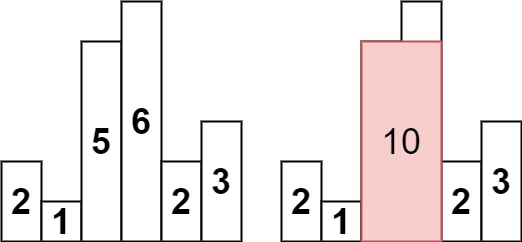

Input: heights = [2,1,5,6,2,3]

Output: 10

Explanation: The above is a histogram where width of each bar is 1.
The largest rectangle is shown in the red area, which has an area = 10 units.

Example 2:

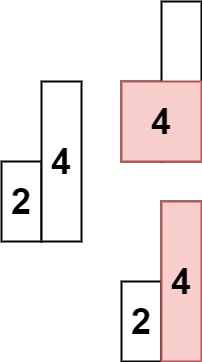

Input: heights = [2,4]

Output: 4


Constraints:

    1 <= heights.length <= 105
    0 <= heights[i] <= 104



In [1]:
from typing import List

In [6]:
def maxlen(heights, i):
    l = 0
    v = [h >= i for h in heights]
    for i in range(len(v)):
        if v[i] and ((i == 0) or not v[i - 1]):
            cl = l
            if all(v[i:i+l]):
                for j in range(i + l, len(v)):
                    if v[j]:
                        cl += 1
                    else:
                        i += cl
                        break
                if cl > l:
                    l = cl
    return l

class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        max_area = 0
        for i in sorted(set(heights)):
            area = i * maxlen(heights, i)
            if area > max_area:
                max_area = area
            
        return max_area

In [7]:
s = Solution()
s.largestRectangleArea([2,1,5,6,2,3])

10

In [2]:
from typing import List

class Solution:
    def largestRectangleArea(self, heights: List[int]) -> int:
        stack = []
        ans = 0
        for (i, height) in enumerate(heights + [0]):
            while stack and stack[-1][0] > height:
                (h, _) = stack.pop()
                start = stack[-1][1] if stack else -1
                w = i - start - 1
                ans = max(ans, h * w)
            stack.append((height, i))
            
        return ans

In [3]:
s = Solution()
s.largestRectangleArea([2,1,5,6,2,3])

10